In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
data_dir = r"D:\New folder\pak_currency"   #  dataset directory

In [2]:
# Image data generator for training, validation, and testing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [3]:
#train-data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# val-data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 8400 images belonging to 10 classes.
Found 2100 images belonging to 10 classes.


In [14]:
# For testing data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 10500 images belonging to 10 classes.


In [5]:
train_generator.class_indices

{'1 Pakistani Rupee coin': 0,
 '10 Pakistani Rupee note': 1,
 '100 Pakistani Rupee note': 2,
 '1000 Pakistani Rupee note': 3,
 '2 Pakistani Rupee coin': 4,
 '20 Pakistani Rupee note': 5,
 '5 Pakistani Rupee coin': 6,
 '50 Pakistani Rupee note': 7,
 '500 Pakistani Rupee note': 8,
 '5000 Pakistani Rupee note': 9}

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# now train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15
)

Epoch 1/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1927 - loss: 2.2539

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


262/262 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.2906 - loss: 1.9405 - val_accuracy: 0.4966 - val_loss: 1.4765
Epoch 2/15
  1/262 ━━━━━━━━━━━━━━━━━━━━ 5:08 1s/step - accuracy: 0.4062 - loss: 1.7045

D:\Anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


262/262 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.4062 - loss: 1.7045 - val_accuracy: 0.5163 - val_loss: 1.4360
Epoch 3/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.6323 - loss: 1.0507 - val_accuracy: 0.6481 - val_loss: 0.9672
Epoch 4/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.8125 - loss: 0.5637 - val_accuracy: 0.6293 - val_loss: 1.1070
Epoch 5/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.7549 - loss: 0.7105 - val_accuracy: 0.7159 - val_loss: 1.0324
Epoch 6/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.7188 - loss: 0.7739 - val_accuracy: 0.7207 - val_loss: 0.9853
Epoch 7/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.8252 - loss: 0.4840 - val_accuracy: 0.7437 - val_loss: 0.9311
Epoch 8/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8125 - loss: 0.4895 - val_accuracy: 0.7428 - val_loss: 0.9202
Epoch 9/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.8552 - loss: 0.4148 - val_accuracy: 0

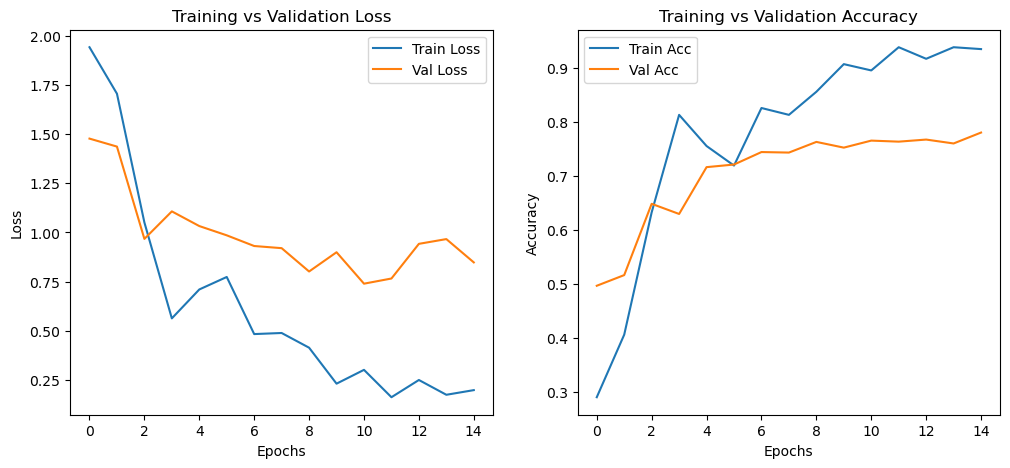

In [12]:
# Plot Accuracy & Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.show()

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

329/329 ━━━━━━━━━━━━━━━━━━━━ 86s 262ms/step - accuracy: 0.9494 - loss: 0.2065
Test Loss: 0.20645032823085785
Test Accuracy: 0.9494285583496094


In [1]:
# Save full model
model.save("Pakistan_Currency_classifier.keras")

NameError: name 'model' is not defined

In [1]:
# test on images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
# Load the trained model
model = load_model('Pakistan_Currency_classifier.keras')

In [4]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(240, 240))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale pixel values
    return img_array

In [5]:
def predict_image_class(img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the index of the highest probability
    return predicted_class

In [6]:
def display_image_and_prediction(img_path):
    predicted_class_index = predict_image_class(img_path)
    
    # Class mapping 
    class_labels = {
        0: '1 Pakistani Rupee coin' ,      
        1:'10 Pakistani Rupee note' ,     
        2: '100 Pakistani Rupee note',  
        3: '1000 Pakistani Rupee note', 
        4: '2 Pakistani Rupee coin',       
        5: '20 Pakistani Rupee note',        
        6: '5 Pakistani Rupee coin',        
        7: '50 Pakistani Rupee note',      
        8: '500 Pakistani Rupee note',     
        9: '5000 Pakistani Rupee note'  
    }
    
    # Get the predicted label using the predicted class index
    predicted_label = class_labels[predicted_class_index]

    # Load and display the image
    img = image.load_img(img_path, target_size=(240, 240))
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


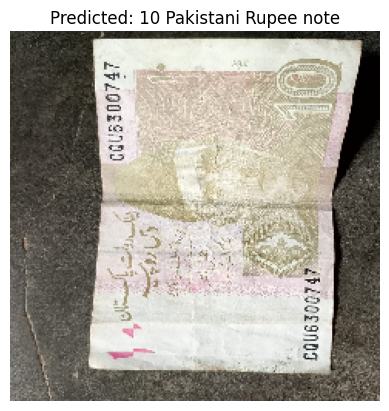

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


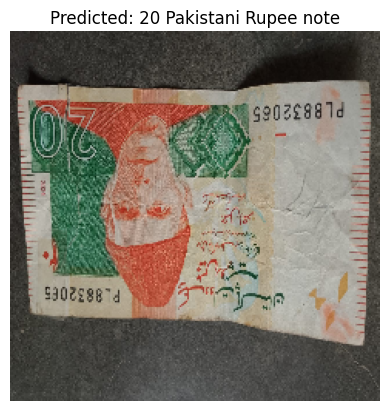

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


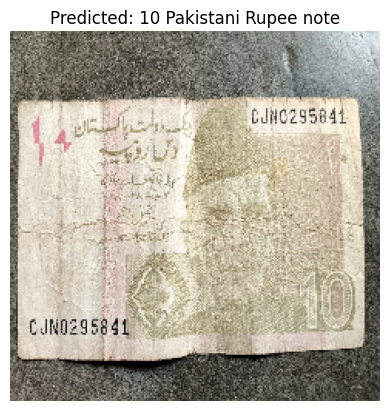

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


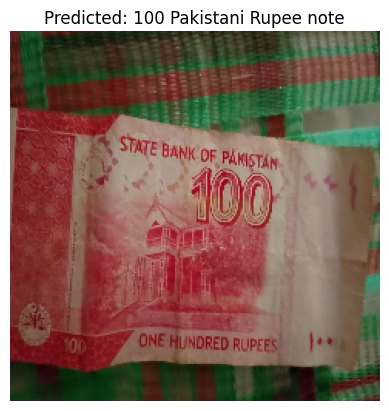

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


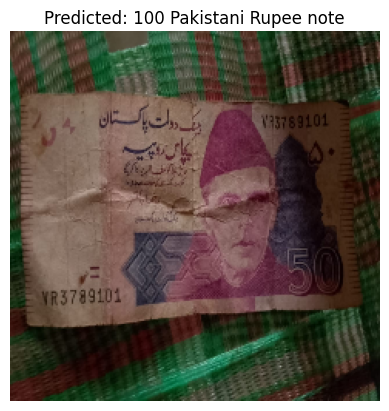

In [7]:
# Example usage
image_paths = ['Image_1.jpg',
               'Image_2.jpg',
               'Image_3.jpg',
               'Image_4.jpg',
               'Image_5.jpg'
              ]
for img_path in image_paths:
    display_image_and_prediction(img_path)